# Biodiversity Project



Let's work as biodiversity analysts to analyze data from national parks. 
> **Note:** The data for this project is inspired by real data, but is mostly fictional.

#### Questions/Objectives:

1. **Endangered Species**: Are certain species more likely to be endangered?
  
2. **Conservation Status**: How many species are endangered, threatened, in recovery, or species of concern?

3. **Bat Observations**: In which national parks is the Cassin's Finch most commonly observed?
    

4. **Conservation and Observations of Bats**: Is the conservation status of Cassin's Finch reflected in the number of observations?



In [1]:
from matplotlib import pyplot as plt
import pandas as pd

There are two csv files: species_info.csv and observations.csv let's start with the species_info.csv data set

In [3]:
species = pd.read_csv("species_info.csv")

In [4]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Let's answer some questions

How many different species are in the species DataFrame?

In [6]:
species_count= species.scientific_name.nunique()
print(species_count)


5541


What are the different values of category in species?

In [7]:
species_category = species.category.unique()
print(species_category)

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


What are the different values of conservation_status?

In [9]:
conserv_stats_val= species.conservation_status.unique()
print(conserv_stats_val)

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Let's begin our analysis!

What is the count of species for each unique conservation status?

In [12]:
status_counts = species.groupby('conservation_status').scientific_name.nunique().reset_index()
print(status_counts)

  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                4
2  Species of Concern              151
3          Threatened               10


We saw earlier that there are around 5541 species so in the above chart, the NAN values are missing, let's add them

In [13]:
species.fillna('No Intervention', inplace=True)

In [14]:
status_counts = species.groupby('conservation_status').scientific_name.nunique().reset_index()
print(status_counts)

  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                4
2     No Intervention             5363
3  Species of Concern              151
4          Threatened               10


In [15]:
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')

Now let's create a bar chart!

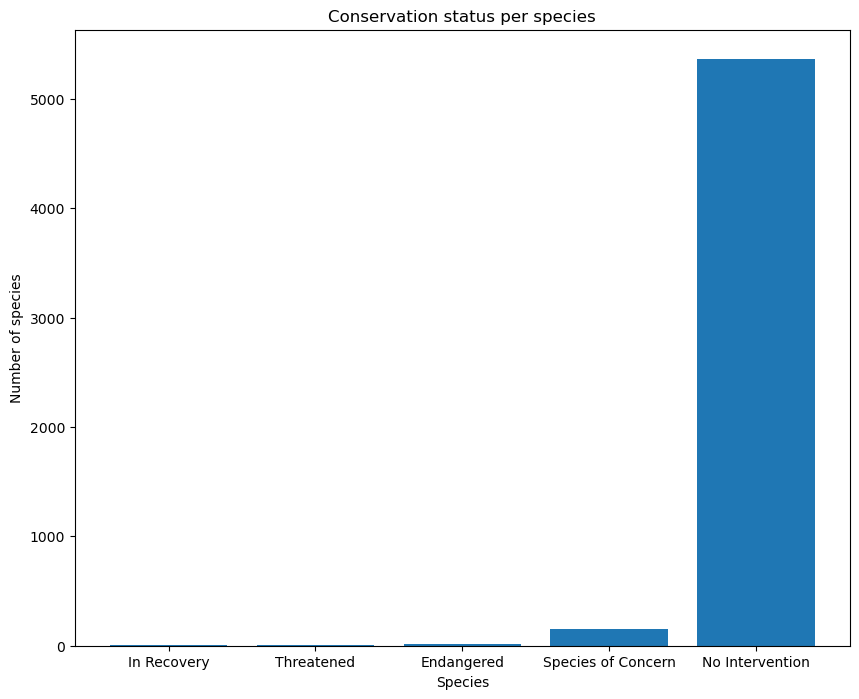

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(10,8))
ax=plt.subplot()
plt.bar(range(len(protection_counts)), protection_counts.scientific_name.values)
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts.conservation_status.values)
plt.xlabel("Species")
plt.ylabel("Number of species")
plt.title("Conservation status per species")
plt.show()
plt.savefig('Conservation status per species.png')

Are certain types of species more likely to be endangered?

In [18]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [19]:
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()
print(category_counts)

             category  is_protected  scientific_name
0           Amphibian         False               72
1           Amphibian          True                7
2                Bird         False              413
3                Bird          True               75
4                Fish         False              115
5                Fish          True               11
6              Mammal         False              146
7              Mammal          True               30
8   Nonvascular Plant         False              328
9   Nonvascular Plant          True                5
10            Reptile         False               73
11            Reptile          True                5
12     Vascular Plant         False             4216
13     Vascular Plant          True               46


In [20]:
category_counts.head()

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115


In [21]:
category_pivot = category_counts.pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                                .reset_index()

In [22]:
category_pivot

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [23]:
category_pivot.columns = ['category', 'not_protected', 'protected']

In [24]:
category_pivot['percent_protected']= category_pivot.protected / (category_pivot.protected + category_pivot.not_protected)*100

In [25]:
category_pivot

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


It looks like species in category Mammal are more likely to be endangered than species in Bird. We're going to do a significance test to see if this statement is true. Since it is a categorical data and we'll compare two samples, we need to do a chi squared test.

In [26]:
from scipy.stats import chi2_contingency
contingency = [[30, 146],
              [75, 413]]

In [27]:
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

It looks like this difference isn't significant!

Let's test another. Is the difference between Reptile and Mammal significant?

In [28]:
contingency = [[30, 146],
               [5, 73]]
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

Yes! It looks like there is a significant difference between Reptile and Mammal!

# Observations

In [29]:
observations = pd.read_csv("observations.csv")
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Some scientists are studying the number of bison sightings at different national parks. There are several different scientific names for different types of bison. We'd like to know which rows of species are referring to bison.

In [33]:
species['is_bat']= species.common_names.apply(
lambda x: True if 'Bat' in x else False
)

In [34]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bison,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,False,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,False,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,False,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,False,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,False,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,False,True


In [35]:
bat_species = species[(species.is_bat == True) & (species.category == 'Mammal')]
bat_species

,category,scientific_name,common_names,conservation_status,is_protected,is_bison,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,False,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,False,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,False,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,False,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,False,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,False,True


In [38]:
bat_observations = observations.merge(bat_species)
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bison,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,False,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,False,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,False,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,False,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,False,True
...,...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,False,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True


How many total bat observations were made at each national park?

This is the total number of bat observed in each park over the past 7 days.

In [39]:
obs_by_park = bat_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Bar Chart

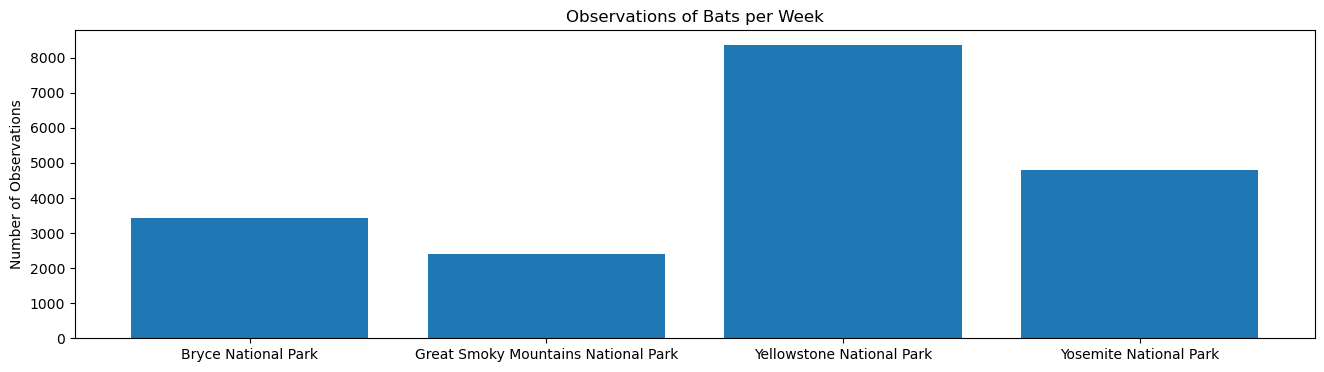

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize=(16, 4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park)),
        obs_by_park.observations.values)
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park.park_name.values)
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()
plt.savefig('Observations of bats per week.png')

Researchers are aware that 20% of bats in Yosemite National Park are affected by White-Nose Syndrome, a fungal disease that is fatal to bats. Park rangers at the Great Smoky Mountains National Park have initiated a program to mitigate the impact of this disease. The researchers aim to evaluate the effectiveness of this program. Specifically, they want to detect reductions in disease prevalence of at least 5 percentage points. For example, if the program is effective and only 15% of bats in Great Smoky Mountains are now affected, the researchers want to confirm this with confidence.

To achieve this, we'll use statistical methods to calculate the required sample size for observing bats in both parks. We'll operate under the default level of significance, which is 90%.

The first step in this process is to calculate the minimum detectable effect.



In [41]:
minimum_detectable_effect = 100 * 0.05 / 0.20
minimum_detectable_effect

25.0

In [43]:
sample_size_per_variant = 9000

In [44]:
bryce = 9000 / 3433
yellowstone = 9000 / 8362